# Purposes
1. Impove my data analysis skills
2. Get more familiar with Pandas and seaborn for data visualization and data visualization and data analysis
4. Get hands-on with descirptive and inferencial statistic for bivariab analysis : finding dependency

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from tqdm import tqdm
import seaborn as sns
import sys
import math as m
import scipy.stats as stats
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Data loading

In [2]:
#loading data
#Dowload link : https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset
data=pd.read_csv('dataset/customer_shopping_data.csv')

In [3]:
#Get the data shape
data.shape

(99457, 10)

In [4]:
#Get the columns names
data.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

Vizualize the data structure

In [5]:
#Get a overwiew on the dataset
data.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


# Errors detection
1. Errors type
2. Missing values
3. Duplicated rows
4. Consistence
5. Outlier detection

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


#### Data type error

In [1]:
# 1. Errors types
data.dtypes

NameError: name 'data' is not defined

#### Fix data type error

In [11]:
def convert_date_time(date):
    date1=date.split('/')
    date1=str(int(date1[0])) +'/'+ str(int(date1[1])) + '/' + str(int(date1[2]))
    return date1
#Without this function we can't convert all datetime to the right format.In fact '11/06/2022' and '11/6/2022' are not the same format so we can
#Not make the convertion with those two format

In [12]:
#invoice date should be a pandas datetime
for index in tqdm(range(data.shape[0])):
    data.iloc[index,8]=convert_date_time(data.iloc[index,8])
data['invoice_date']=pd.to_datetime(data['invoice_date'],format="%d/%m/%Y")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99457/99457 [00:29<00:00, 3396.24it/s]


In [13]:
#Check the convert result by checking the data type
data.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

In [14]:
#Check if the convert is well done
data.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon


#### Missing values detection

In [15]:
#2. Missing values detections
#Got no missing data
data_nan=data.isnull().sum()
data_nan[data_nan >0]

Series([], dtype: int64)

#### Deplicated data detection

In [16]:
#3. check  duplicated data
data.loc[data.duplicated(keep=False)]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


#### Check the consistence, for exemple make sure that we don't have Book' 'Books','book', ' Book'

In [17]:
#4. Check the consistence, for exemple make sure that we don't have Book' 'Books','book', ' Book', etc.
data['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [18]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
data['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [20]:
data['shopping_mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

#### Outlier detection

In [21]:
# 5. 
data.describe()

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


In [ ]:
#this correct, in fact we have
# 1. No negative age, quantity and price
# 2. No age beyond 100
# 3. same number of age, quantity, price, invoice_date

In [29]:
# Let ding into our analysis in order to detect some outlier or inconsistence
data.loc[data.price==5.23,:]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
21,I412481,C125696,Female,27,Food & Beverage,1,5.23,Cash,2021-05-01,Cevahir AVM
35,I339732,C276887,Male,68,Food & Beverage,1,5.23,Credit Card,2023-01-04,Emaar Square Mall
84,I249424,C158160,Male,22,Food & Beverage,1,5.23,Cash,2022-02-18,Mall of Istanbul
88,I108359,C253905,Male,66,Food & Beverage,1,5.23,Cash,2022-06-07,Mall of Istanbul
132,I745394,C249877,Male,54,Food & Beverage,1,5.23,Cash,2021-12-14,Metropol AVM
...,...,...,...,...,...,...,...,...,...,...
99299,I711950,C212383,Female,20,Food & Beverage,1,5.23,Debit Card,2022-05-30,Istinye Park
99300,I144439,C245356,Female,23,Food & Beverage,1,5.23,Debit Card,2021-11-08,Kanyon
99319,I881994,C168570,Female,59,Food & Beverage,1,5.23,Cash,2022-03-07,Istinye Park
99321,I234667,C321665,Male,69,Food & Beverage,1,5.23,Debit Card,2021-10-11,Metropol AVM


In [33]:
data.loc[(data.price==5.23) & (data.quantity==1) & (data.category=='Food & Beverage'),:]
#No outlier detecteed in fact all minimu prise is the same categorie and quantity

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
21,I412481,C125696,Female,27,Food & Beverage,1,5.23,Cash,2021-05-01,Cevahir AVM
35,I339732,C276887,Male,68,Food & Beverage,1,5.23,Credit Card,2023-01-04,Emaar Square Mall
84,I249424,C158160,Male,22,Food & Beverage,1,5.23,Cash,2022-02-18,Mall of Istanbul
88,I108359,C253905,Male,66,Food & Beverage,1,5.23,Cash,2022-06-07,Mall of Istanbul
132,I745394,C249877,Male,54,Food & Beverage,1,5.23,Cash,2021-12-14,Metropol AVM
...,...,...,...,...,...,...,...,...,...,...
99299,I711950,C212383,Female,20,Food & Beverage,1,5.23,Debit Card,2022-05-30,Istinye Park
99300,I144439,C245356,Female,23,Food & Beverage,1,5.23,Debit Card,2021-11-08,Kanyon
99319,I881994,C168570,Female,59,Food & Beverage,1,5.23,Cash,2022-03-07,Istinye Park
99321,I234667,C321665,Male,69,Food & Beverage,1,5.23,Debit Card,2021-10-11,Metropol AVM


In [34]:
data.loc[data.price==5250,:]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
23,I252275,C313348,Male,44,Technology,5,5250.0,Cash,2021-10-26,Kanyon
69,I883721,C236859,Female,44,Technology,5,5250.0,Credit Card,2021-11-19,Mall of Istanbul
363,I194017,C462011,Female,67,Technology,5,5250.0,Cash,2022-01-03,Kanyon
391,I252528,C333065,Male,47,Technology,5,5250.0,Debit Card,2022-10-04,Cevahir AVM
570,I311849,C178487,Male,27,Technology,5,5250.0,Debit Card,2021-04-21,Cevahir AVM
...,...,...,...,...,...,...,...,...,...,...
98668,I236291,C724141,Female,23,Technology,5,5250.0,Cash,2022-09-08,Kanyon
98720,I285991,C894009,Female,46,Technology,5,5250.0,Cash,2023-01-24,Forum Istanbul
98787,I282417,C247846,Female,51,Technology,5,5250.0,Cash,2021-06-26,Mall of Istanbul
99058,I223483,C877031,Female,32,Technology,5,5250.0,Debit Card,2022-02-05,Kanyon


In [35]:
data.loc[(data.price==5250) & (data.quantity==5) & (data.category=='Technology'),:]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
23,I252275,C313348,Male,44,Technology,5,5250.0,Cash,2021-10-26,Kanyon
69,I883721,C236859,Female,44,Technology,5,5250.0,Credit Card,2021-11-19,Mall of Istanbul
363,I194017,C462011,Female,67,Technology,5,5250.0,Cash,2022-01-03,Kanyon
391,I252528,C333065,Male,47,Technology,5,5250.0,Debit Card,2022-10-04,Cevahir AVM
570,I311849,C178487,Male,27,Technology,5,5250.0,Debit Card,2021-04-21,Cevahir AVM
...,...,...,...,...,...,...,...,...,...,...
98668,I236291,C724141,Female,23,Technology,5,5250.0,Cash,2022-09-08,Kanyon
98720,I285991,C894009,Female,46,Technology,5,5250.0,Cash,2023-01-24,Forum Istanbul
98787,I282417,C247846,Female,51,Technology,5,5250.0,Cash,2021-06-26,Mall of Istanbul
99058,I223483,C877031,Female,32,Technology,5,5250.0,Debit Card,2022-02-05,Kanyon


# Graphics
1. Get gender proportion within the dataset
2. Get the more purchase category
3. Get the purchase group by gender

#### 1. Get gender proportion within the dataset

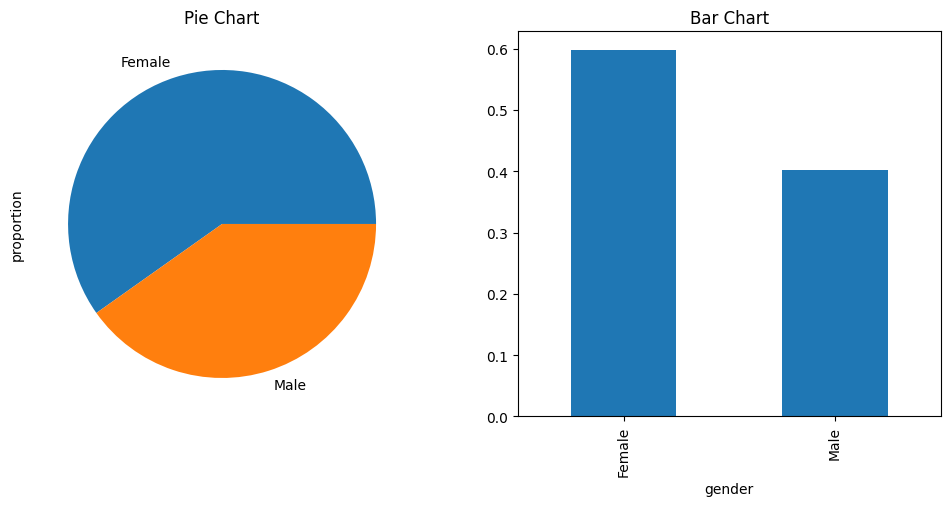

In [453]:

# 1. 

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data['gender'].value_counts(normalize=True).plot(kind='pie', ax=axes[0])
axes[0].set_title('Pie Chart')

data['gender'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])
axes[1].set_title('Bar Chart')

plt.show()

#### 2. Get the more purchase category

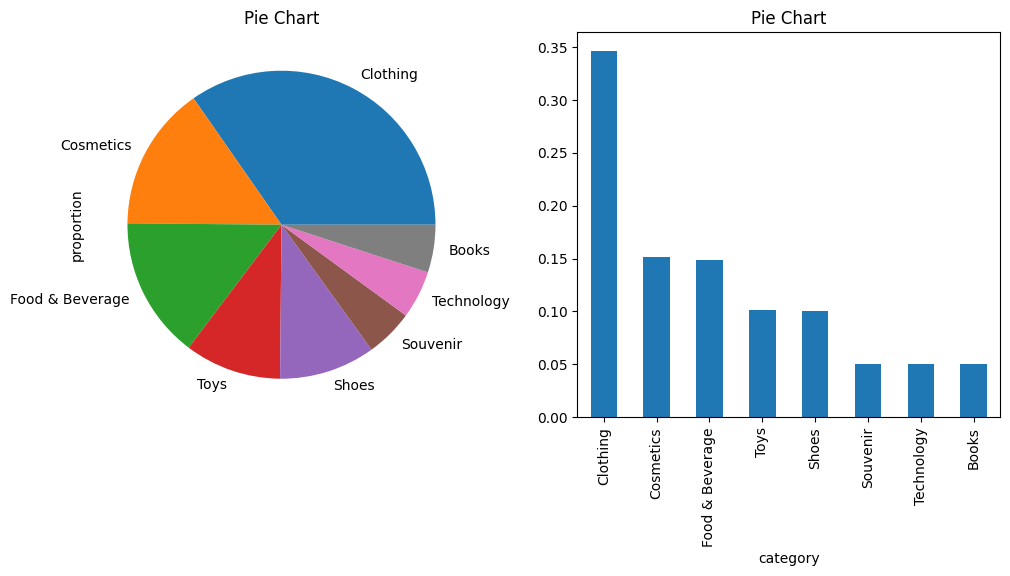

In [454]:
# 2. 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data['category'].value_counts(normalize=True).plot(kind='pie', ax=axes[0])
axes[0].set_title('Pie Chart')

data['category'].value_counts(normalize=True).plot(kind='bar', ax=axes[1])
axes[1].set_title('Pie Chart')

plt.show()

#### 3. Get the purchase group by gender

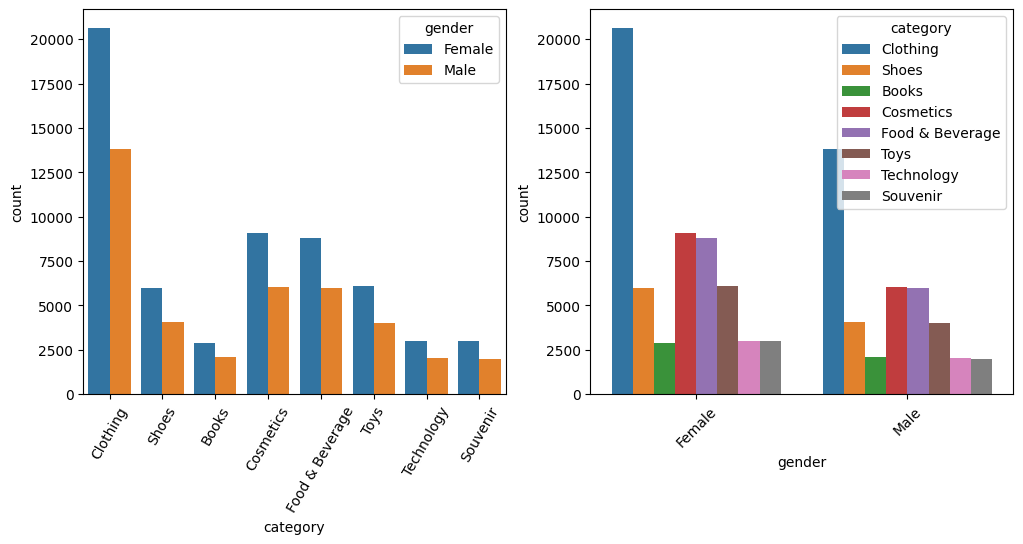

In [455]:
# 3.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax=sns.countplot(x="category", hue="gender", data=data,ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

ax=sns.countplot(x="gender", hue="category", data=data,ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

# Contengencies

In [456]:
crosstab=data[['gender','category']].pivot_table(index=['gender'],columns=['category'],aggfunc=len,margins=True,margins_name='Total')
crosstab

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys,Total
gender,,,,,,,,,
Female,2906,20652,9070,8804,5967,3017,2981,6085,59482
Male,2075,13835,6027,5972,4067,1982,2015,4002,39975
Total,4981,34487,15097,14776,10034,4999,4996,10087,99457


# Chi2 dependacy test between gender and category
1. Hypothesis H0 : gender and category are independant
2. Hypothesis H1 : gender and category are dependant

In [36]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['gender'],data['category'] ))
print(f"chi2 = {chi2}")
print(f"p = {p}")
print(f"dof = {dof}")
alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

chi2 = 7.567873097409636
p = 0.37223416407226817
dof = 7
Independent (H0 holds true)


# Customer's age distribution

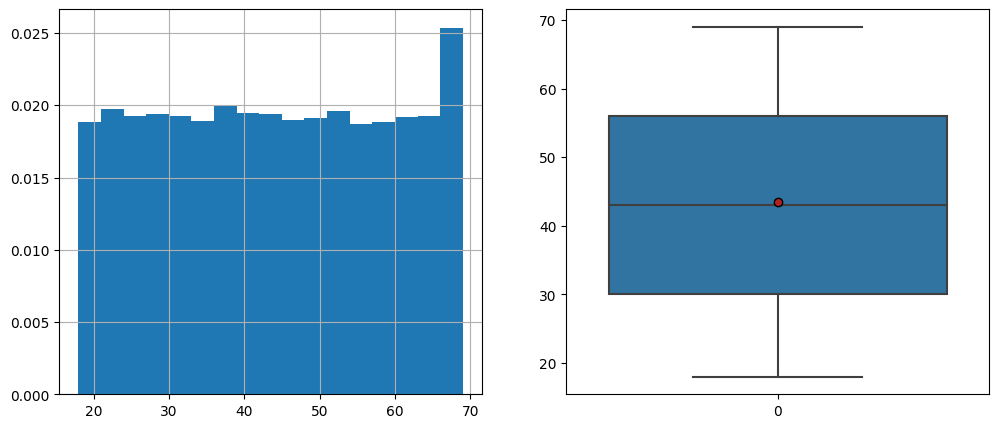

----------------------------------------------------------------------------------------------------------------------------------
Female
----------------------------------------------------------------------------------------------------------------------------------
Male


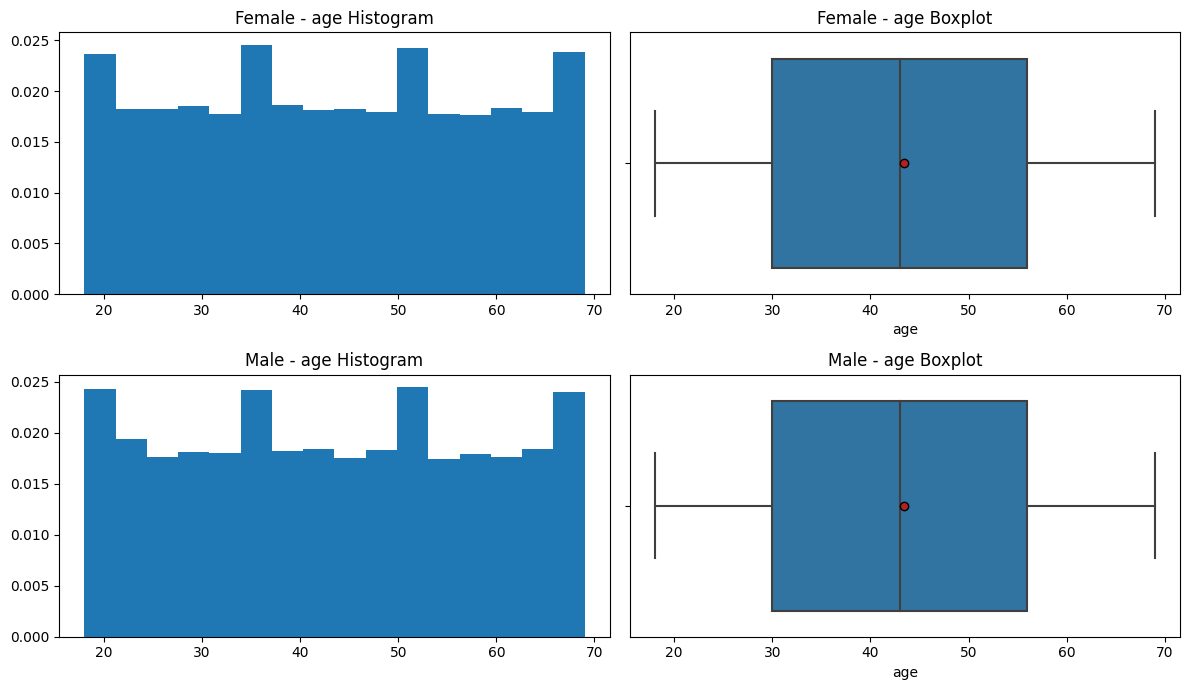

In [69]:


#Sturge's rule
k=int(1 + 3.3*m.log10(data.shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

data['age'].hist(density=True, bins=k,ax=axes[0])

meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'} 
sns.boxplot(data['age'],showmeans=True,meanprops=meanprops,ax=axes[1])

plt.show()

x='gender'
y='age'

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
i = 0

for cat in data[x].unique():
    subset = data.loc[data[x] == cat, :]
    print("-" * 130)
    print(cat)

    k = int(1 + 3.3 * m.log10(subset.shape[0]))
    
    # Plot histogram
    axes[i, 0].hist(subset[y], density=True, bins=k)
    axes[i, 0].set_title(f'{cat} - {y} Histogram')
    
    # Plot boxplot
    meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'firebrick'}
    sns.boxplot(data=subset, x=y, showmeans=True, meanprops=meanprops, ax=axes[i, 1])
    axes[i, 1].set_title(f'{cat} - {y} Boxplot')

    i = i + 1

plt.tight_layout()
plt.show()

1. Customers age are equitably distribute
2. Graphique show that the age distribution du not depend on gender
3. Let check it by some statistics

# Statistics about customer's age

In [37]:
Age=pd.DataFrame(index=['age'])

In [38]:
Age['mean']=data['age'].mean()
Age['median']=data['age'].median()
Age['mode']=data['age'].mode().to_frame().iloc[0,0]
Age['std']=data['age'].std(ddof=True)
Age['skew']=data['age'].skew()
Age['kurtosis']=data['age'].kurtosis()

In [39]:
Age.head()

,mean,median,mode,std,skew,kurtosis
age,43.427089,43.0,37,14.990054,0.009021,-1.198354


In [40]:
Age_by_gender=pd.DataFrame(index=['Female','Male'],columns=['mean','median','std','skew'])

In [41]:

for gend in data.gender.unique():
    Age_by_gender.loc[gend,'mean']=data.groupby(['gender'])['age'].mean()[gend]
    Age_by_gender.loc[gend,'median']=data.groupby(['gender'])['age'].median()[gend]
    Age_by_gender.loc[gend,'std']=data.groupby(['gender'])['age'].std(ddof=True)[gend]
    Age_by_gender.loc[gend,'skew']=data.groupby(['gender'])['age'].skew()[gend]
    


In [42]:
Age_by_gender.head()

,mean,median,std,skew
Female,43.453515,43.0,14.965468,0.009219
Male,43.387767,43.0,15.026664,0.008794


1. These statistic above confirm the graphique results
2. Let's go deeper withoin this analysis by using Person's Chi-squere test in order to prove that there are no dependency between customer gender's and age's

# Correlation raport between gender and age (qualitative and quantitative variables)

In [43]:
def rapport_corr(x,y):
    '''x est une variable qualitative
    y est une variable quantitative
    '''
    somme = 0
    for facteur in x.value_counts().index:
        ind = x[x == facteur].index
        classe = y.iloc[ind,]
        somme = somme + len(classe)*np.sum((np.mean(classe)-np.mean(y))**2)
        y_ecart = np.sum((y-np.mean(y))**2)
        rc = somme/y_ecart
        #rc.index = ['Rapport de Correlation']
    return rc
print(rapport_corr(data.gender,data.age))


4.624516467573275e-06


The output above is to close to zeo, whitch means that there is no correlation between the customer's gender and age.

This confirm the graphics and statistics resultats about those two varaible

# Correlation raport between category and age (qualitative and quantitative variables)

In [73]:
print(rapport_corr(data.category,data.age))
pd.crosstab(data.category,data.age)

2.8811670742933847e-05


age,18,19,20,21,22,23,24,25,26,27,...,60,61,62,63,64,65,66,67,68,69
category,,,,,,,,,,,,,,,,,,,,,
Books,106,94,89,88,106,95,109,101,86,87,...,93,95,96,95,103,92,82,104,98,99
Clothing,646,687,641,667,735,626,684,651,662,700,...,679,668,644,654,717,606,643,666,676,650
Cosmetics,267,289,269,289,318,279,268,297,285,289,...,276,310,304,267,296,296,302,273,260,305
Food & Beverage,281,290,292,288,286,307,307,255,274,277,...,264,302,293,261,291,283,303,284,278,255
Shoes,171,207,197,198,188,202,204,183,207,194,...,188,190,211,220,191,190,198,184,181,187
Souvenir,108,86,83,103,103,86,103,96,111,99,...,108,87,95,112,93,98,84,98,88,96
Technology,89,86,77,90,116,85,105,103,87,95,...,111,93,83,81,112,110,96,86,97,92
Toys,176,197,196,224,199,217,197,177,184,209,...,155,200,183,196,199,181,168,206,215,217


In [72]:
print(rapport_corr(data.category,data.price))
print(rapport_corr(data.gender,data.price))

0.7228614479539475
2.1022466891310616e-06


1. Correlation coef between customer gender and age is to close to 0
2. One can then conclude that there is no correlation between these to variables
3. This confirm the graphics result

In [378]:
man_withney_t,man_withney_pvalue = stats.mannwhitneyu(data.gender,data.age)
print(f'nMan-Withney test : statistique = {man_withney_t} ; pvalue = {man_withney_pvalue}')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [381]:
data.loc[data['gender'].isna(),:]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [336]:
data['gender'].value_counts().values

array([59482, 39975])

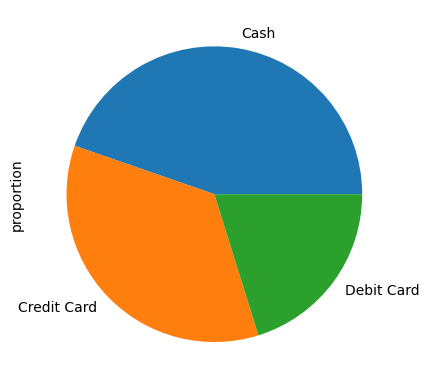

In [175]:
data['payment_method'].value_counts(normalize=True).plot(kind='pie')
plt.show()